In [1]:
# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler

In [2]:
data = pd.read_csv("glass.csv")

In [3]:
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [4]:
data['Type'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

In [5]:
data.duplicated().sum()

1

In [6]:
data.drop_duplicates(inplace=True)

In [7]:
data.duplicated().sum()

0

In [8]:
X=data.drop("Type",axis=1)

In [9]:
y=data["Type"]

In [10]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:

# scaling
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [12]:
def knn_tarining(X_train,y_train,X_test,K):
    '''
    X_train--> training data
    y_train--> label for the training
    X_test--> it is for the validation
    K--> it is number of the nearest neighbours
    
    '''
    knn = KNeighborsClassifier(n_neighbors = K)
    knn.fit(X_train,y_train)
    prediction = knn.predict(X_test)
    return prediction


In [13]:

import math

n=data.shape[0]
K=math.sqrt(n)


In [14]:
K=int(K)

In [15]:
pred=knn_tarining(X_train,y_train,X_test,K)

accuracy_score(y_test,pred)


0.46511627906976744

In [16]:

K_value=range(1,21)
accuracy=[]

In [17]:
for K in K_value:
    y_pred=knn_tarining(X_train,y_train,X_test,K)
    acc= accuracy_score(y_test,y_pred)
    accuracy.append(acc)
    print(f"for this K value {K} this is my acc {acc}")
    
    

for this K value 1 this is my acc 0.627906976744186
for this K value 2 this is my acc 0.627906976744186
for this K value 3 this is my acc 0.5813953488372093
for this K value 4 this is my acc 0.6511627906976745
for this K value 5 this is my acc 0.6511627906976745
for this K value 6 this is my acc 0.6511627906976745
for this K value 7 this is my acc 0.6511627906976745
for this K value 8 this is my acc 0.6744186046511628
for this K value 9 this is my acc 0.6046511627906976
for this K value 10 this is my acc 0.5813953488372093
for this K value 11 this is my acc 0.5813953488372093
for this K value 12 this is my acc 0.5116279069767442
for this K value 13 this is my acc 0.5116279069767442
for this K value 14 this is my acc 0.46511627906976744
for this K value 15 this is my acc 0.46511627906976744
for this K value 16 this is my acc 0.4418604651162791
for this K value 17 this is my acc 0.4418604651162791
for this K value 18 this is my acc 0.4418604651162791
for this K value 19 this is my acc 0.

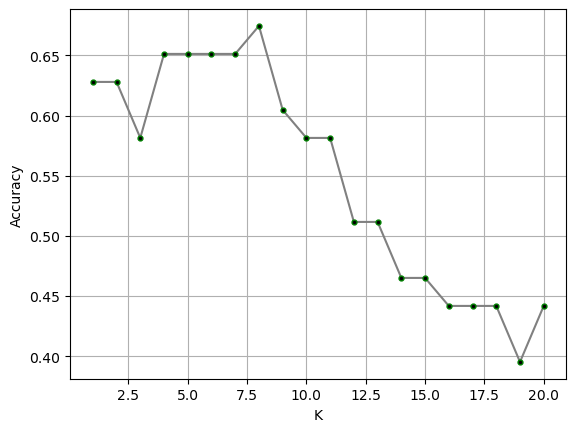

In [18]:
plt.plot(K_value,accuracy,c="grey",marker=".",ms=7,mfc="black",mec="green")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()